In [1]:
import pandas as pd

datafile = pd.read_csv("heart.csv")
datafile.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
feature_names = datafile.columns.tolist()
df = pd.DataFrame(datafile, columns=feature_names)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Bad key "text.kerning_factor" on line 4 in
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


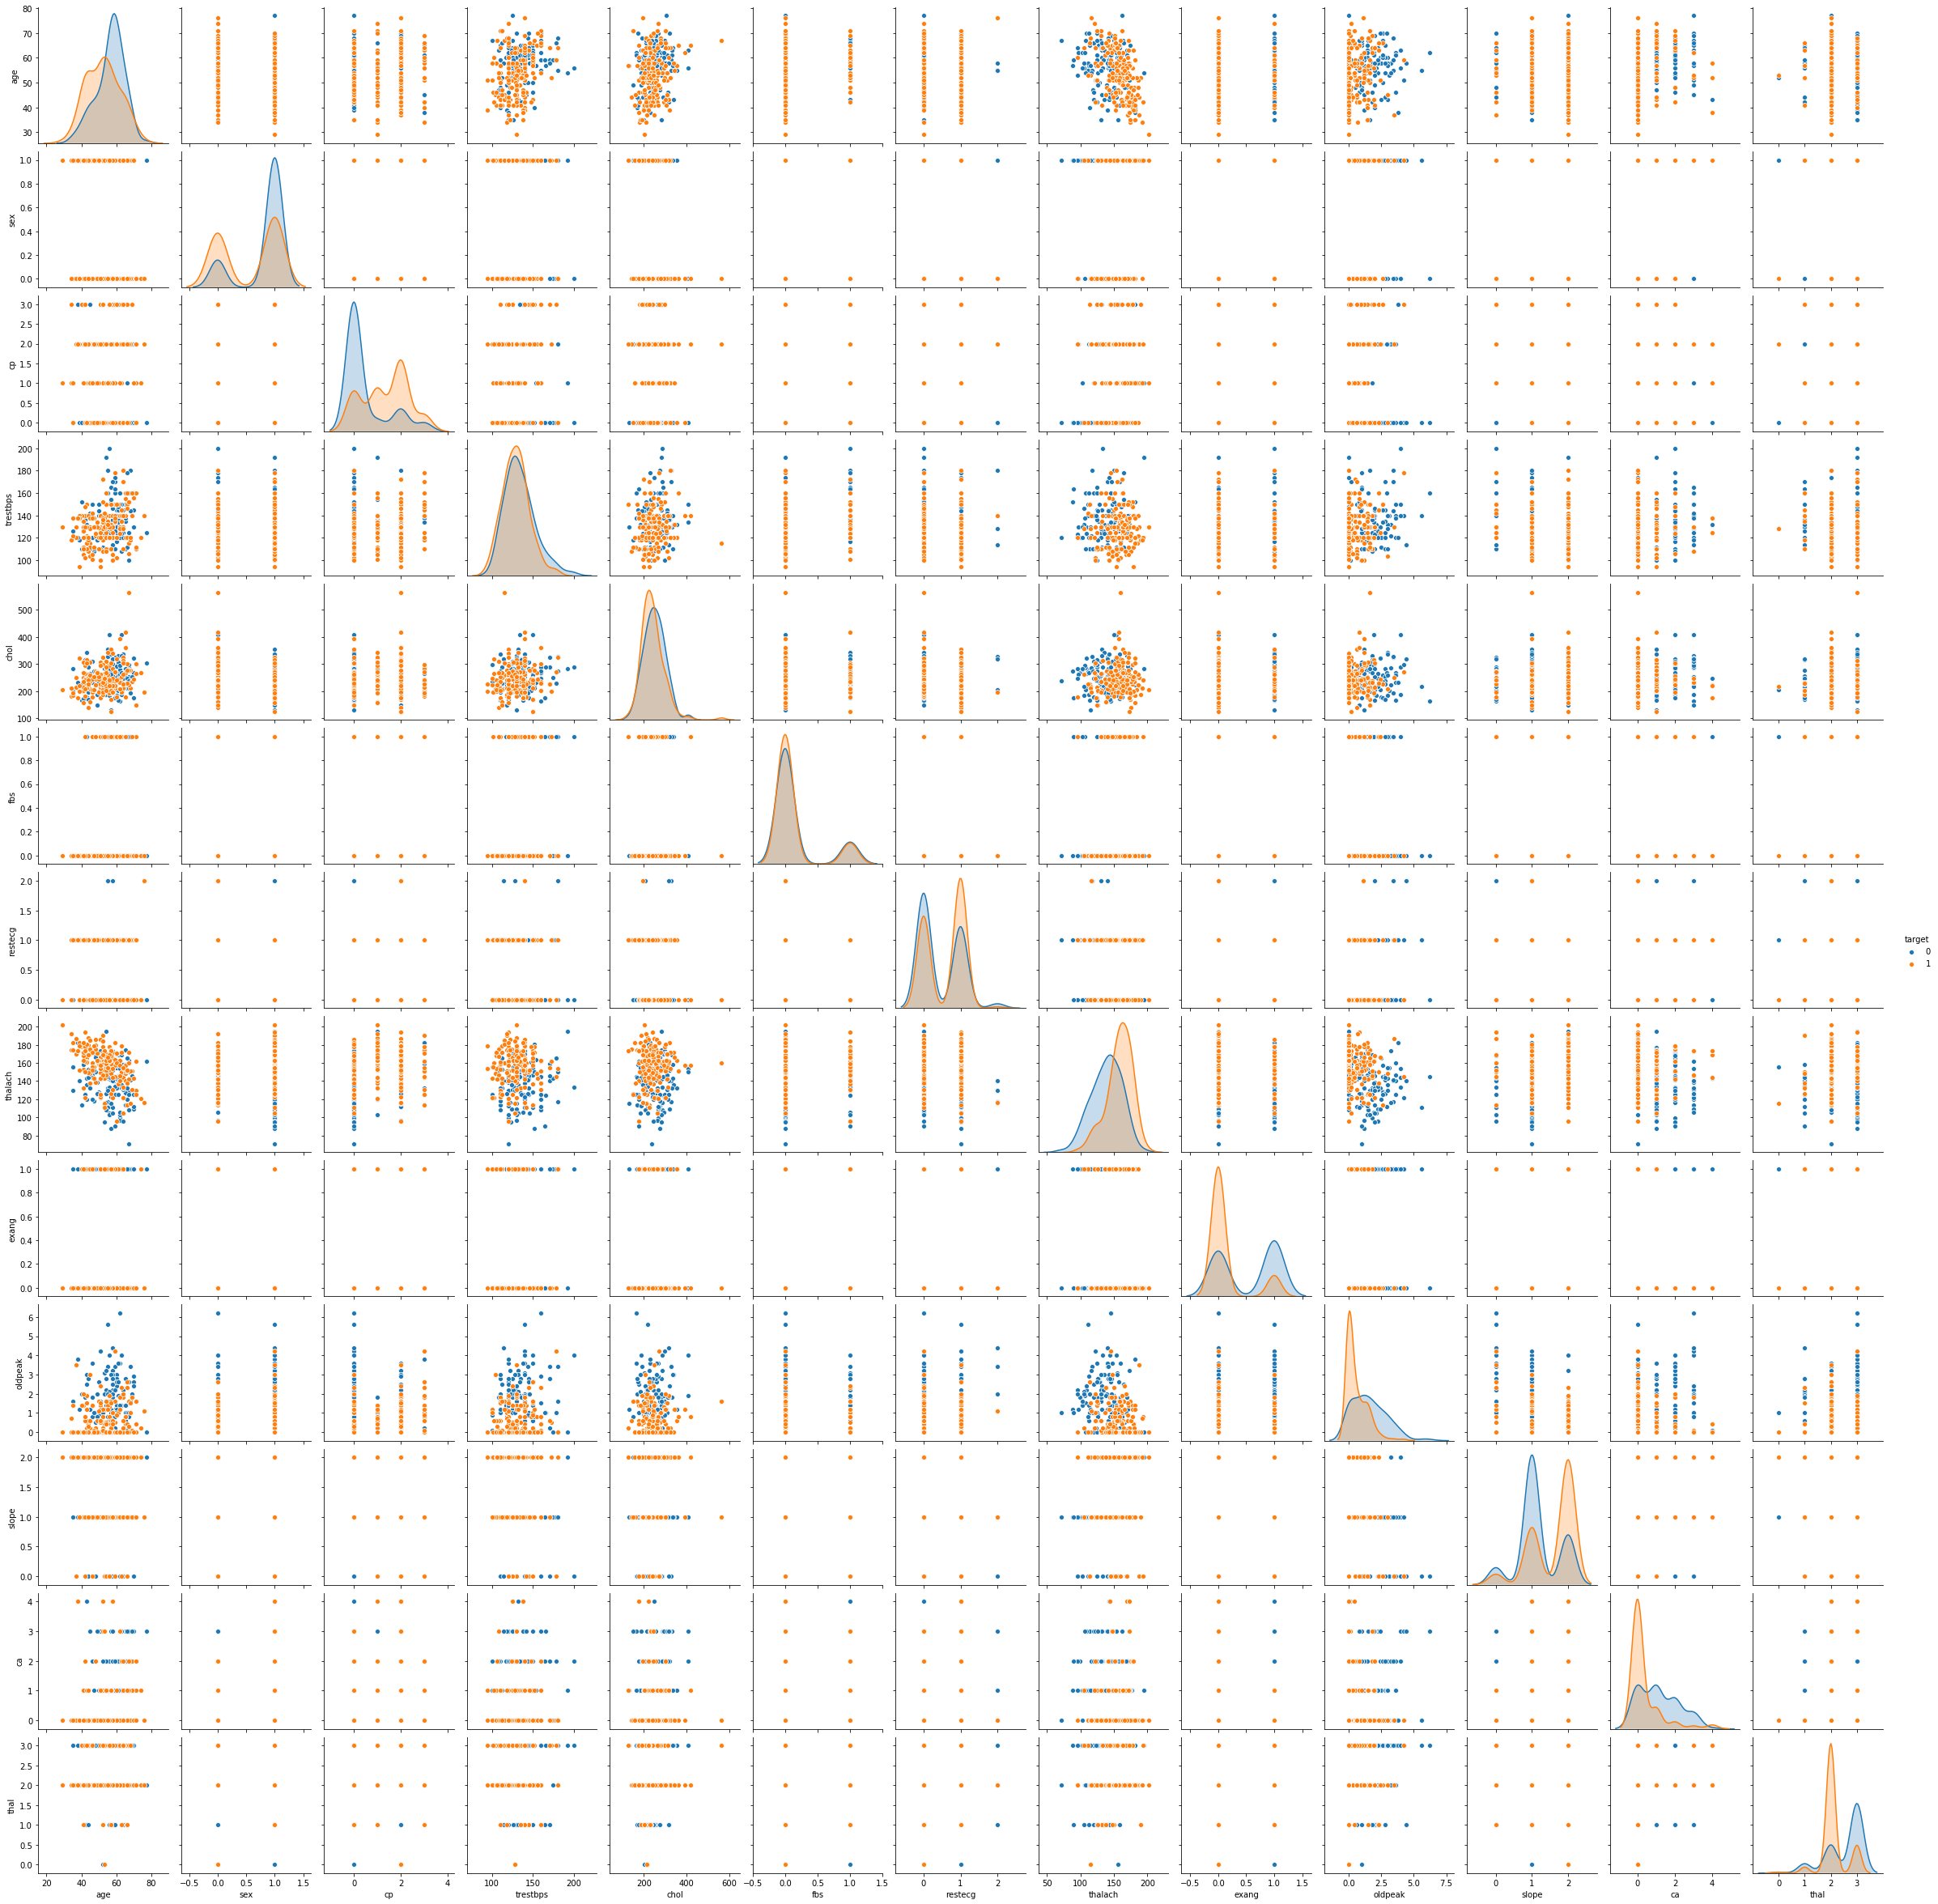

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns_plot = sns.pairplot(df, hue="target")
plt.show()

sns_plot.savefig('heartdisease.png')

#sex, cp, thalach, exang, ^oldpeak, slope, thal

In [3]:
#split train & test set
#age, sex, cp, thalach, exang, ^oldpeak, slope, ca, thal
from sklearn.model_selection import train_test_split

'''
X = datafile[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
             'exang', 'oldpeak', 'slope', 'ca', 'thal']]
'''
X = datafile[['age', 'sex', 'cp', 'thalach', 
             'exang', 'oldpeak', 'slope', 'ca', 'thal']]
             
y = datafile[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)



In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import cm

sc = StandardScaler()
sc.fit(X_train)
#Regularization
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''
#classification with SVM
clf = SVC(C=100)
clf.fit(X_train_scaled, y_train)

#classification
y_train_hat = clf.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(y_train, y_train_hat))
y_test_hat = clf.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(y_test, y_test_hat))
'''

#classification with SVM
model1 = SVC(C=100)
model1.fit(X_train_scaled, y_train)
print('model1 : default')

#classification
y_train_hat1 = model1.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(y_train, y_train_hat1))
y_test_hat1 = model1.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(y_test, y_test_hat1))

model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)
print('model2 : linear')

y_train_hat2 = model2.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(y_train, y_train_hat2))
y_test_hat2 = model2.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(y_test, y_test_hat2))

model3 = SVC(kernel='poly', random_state=0, gamma=10, C=1)
model3.fit(X_train_scaled, y_train)
print('model3 : poly')

y_train_hat3 = model3.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(y_train, y_train_hat3))
y_test_hat3 = model3.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(y_test, y_test_hat3))

model4 = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
model4.fit(X_train_scaled, y_train)
print('model4 : rbf')

y_train_hat4 = model4.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(y_train, y_train_hat4))
y_test_hat4 = model4.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(y_test, y_test_hat4))

'''
model1 = SVC(kernel='linear').fit(X_train_scaled, y_train)
model2 = SVC(kernel='poly', random_state=0, gamma=10, C=1).fit(X_train_scaled, y_train)
model3 = SVC(kernel='rbf', random_state=0, gamma=1, C=1).tif(X_train_scaled, y_train)

plt.figure(figsize=(8, 12))
plt.subplot(311)
'''

model1 : default
train accuracy :  0.9958677685950413
test accuracy :  0.7704918032786885
model2 : linear
train accuracy :  0.8429752066115702
test accuracy :  0.8688524590163934
model3 : poly
train accuracy :  1.0
test accuracy :  0.7377049180327869
model4 : rbf
train accuracy :  0.9958677685950413
test accuracy :  0.8032786885245902


C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array w

"\nmodel1 = SVC(kernel='linear').fit(X_train_scaled, y_train)\nmodel2 = SVC(kernel='poly', random_state=0, gamma=10, C=1).fit(X_train_scaled, y_train)\nmodel3 = SVC(kernel='rbf', random_state=0, gamma=1, C=1).tif(X_train_scaled, y_train)\n\nplt.figure(figsize=(8, 12))\nplt.subplot(311)\n"

C:\Users\WonjunChun\Anaconda3\envs\venv\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


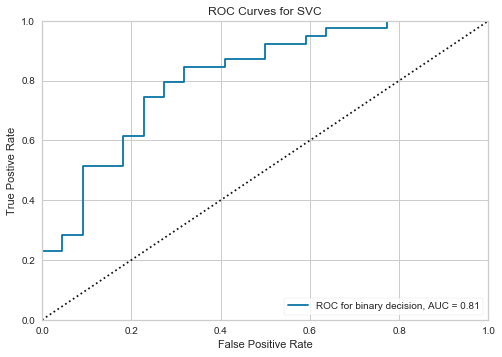

In [7]:
#ROC curve
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model1, classes=[0, 1], micro=False, macro=False, per_class=False)
visualizer.fit(X_test_scaled, y_test)
visualizer.score(X_test_scaled, y_test)
visualizer.show()